<a href="https://colab.research.google.com/github/eriksali/DNN_2023_DL/blob/main/Copy_of_Copy_of_a1_pytorch_sklearn_knn_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#the pseudo-inverse approach

import numpy as np 
from numpy import linalg as LA

X = np.array([[6, 4], [10, 4], [12, 5], [14, 7], [16, 9], [18, 12], [22, 14], [24, 20], [26, 21], [32, 24]])
Y = np.array([40, 44, 46, 48, 52, 58, 60, 68, 74, 80])

B = LA.lstsq(X,Y)
print(B[0])
ypred = np.matmul(X, B[0])
print(ypred)





[ 4.80183541 -2.64821309]
[18.21816011 37.42550175 44.38095949 48.68820413 52.99544878 54.65448034
 68.56539581 62.27978811 69.23524584 90.10161904]


<ipython-input-2-aaaa89fb0fbc>:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  B = LA.lstsq(X,Y)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np 
import pandas as pd 

from sklearn.neighbors import KNeighborsClassifier


df_yield = pd.read_csv('./corn_yield.csv')

yield_df_onehot = pd.get_dummies(df_yield, columns=['Fertilizer','Insecticides','Corn'])
features=yield_df_onehot.loc[:, yield_df_onehot.columns != 'Corn']
label=df_yield['Corn']

  


from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features=scaler.fit_transform(features) 



from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.2, random_state=100)

from sklearn.metrics import r2_score
def compare_models(model):
    model_name = model.__class__.__name__
    fit=model.fit(train_data, train_labels)
    y_pred=fit.predict(test_data)
    r2=r2_score(test_labels,y_pred)
    return([model_name,r2])


# Let us import some libraries that we will use quite often
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression


test_df=pd.DataFrame(test_data,columns=yield_df_onehot.loc[:, yield_df_onehot.columns != 'Corn'].columns) 



# train the model
knn = KNeighborsClassifier(n_neighbors=3)
model=knn.fit(train_data, train_labels)
y_pred = knn.predict(test_data)
 
# compute accuracy of the model
knn.score(test_data, test_labels)

# using Softmax Regression (multi-class classification problem)
##log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
# 'C' is hypeparameter for regularizing L2
# 'lbfgs' is Byoden-Fletcher-Goldfarb-Shanno(BFGS) algorithm
##model=log_clf.fit(train_data, train_labels)

##model=clf.fit(train_data,train_labels)

test_df["yield_predicted"]= model.predict(test_data)
test_df["yield_actual"]=pd.DataFrame(test_labels)["Corn"].tolist()
test_group=test_df.groupby("ID")
test_group.apply(lambda x: r2_score(x.yield_actual, x.yield_predicted))


fig, ax = plt.subplots() 

ax.scatter(test_df["yield_actual"], test_df["yield_predicted"], edgecolors=(0, 0, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()




In [ ]:

#Import the next modules:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
##########################

#load data
x_data = np.load('x.npy', allow_pickle=True)
y_data = np.load('y.npy')
plt.plot(x_data, y_data)
plt.show()

#create variables
W = tf.Variable(tf.ones([1]))
b = tf.Variable(tf.zeros([1]))

#create linear model
y = W*x_data + b
# y = tf.matmul(x_data, W)+b

#distance between labels and predicted values
loss = tf.reduce_mean(tf.square(y - y_data))
#optimizer = tf.train.GradientDescentOptimizer(0.001)
optimizer = tf.train.AdamOptimizer(0.007)
train_step = optimizer.minimize(loss)






#init = tf.initialize_all_variables()
#this initializes all variables
session = tf.InteractiveSession()
tf.global_variables_initializer().run()

#saver = tf.train.Saver() #saves the states of the network
N= 4000
for k in range(N):
    session.run(train_step)
    if k%200 == 0:
        print("k =",k, "W =", session.run(W[0]), "b =", session.run(b[0]), "loss =",session.run(loss) )

ww, bb = session.run([W,b])
ww = ww[0]
bb = bb[0]
print("\n The line equation is: ")
print("y = " + str(ww) + " X + " + str(bb)+"\n")








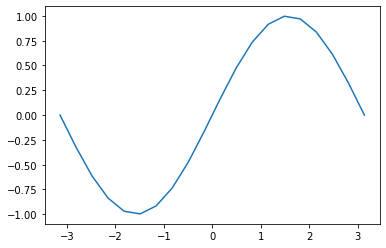

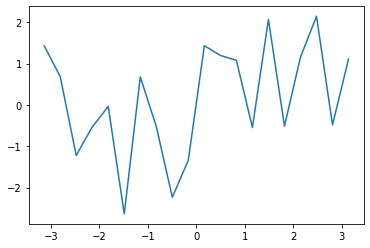

Result: y = -0.932715721913609 + -2.098924060687203 x + 0.6026725554813002 x^2 + -0.26730416777955096 x^3


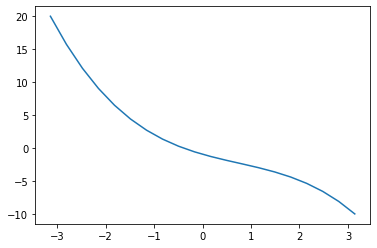

In [ ]:
'''
a1_question_1
'''
import numpy as np
import math

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 20)
y = np.sin(x)

import matplotlib.pyplot as plt
import numpy as np
# if using a jupyter notebook
%matplotlib inline    

#x = np.arange(0,2*np.pi,np.pi/10)   # start,stop,step
#y = np.sin(x) + np.random.normal(0,1,20)

plt.plot(x,y)
plt.show()

y = np.sin(x) + np.random.normal(0, 1, 20)

plt.plot(x,y)
plt.show()

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
for t in range(20):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    ##print(t, loss)
    ##if t % 100 == 99:
        ##print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

#y = {a} + {b} x + {c} x^2 + {d} x^3'

plt.plot(x, y_pred)
plt.show()



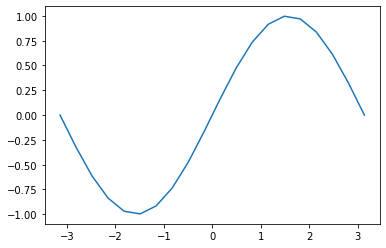

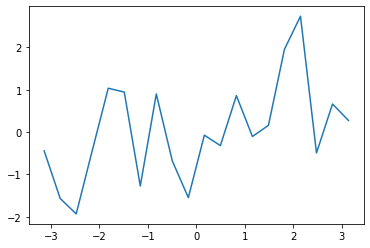

Result: y = 0.863633865171007 + -1.6243856833073613 x + -0.6993062349094348 x^2 + 0.5412524595056611 x^3


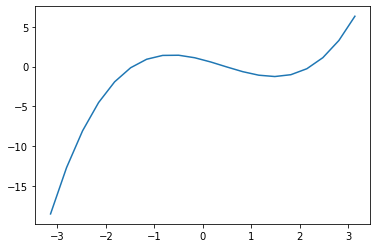

In [ ]:
'''
a1_question_1
'''
import numpy as np
import math

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 20)
y = np.sin(x)

import matplotlib.pyplot as plt
import numpy as np
# if using a jupyter notebook
%matplotlib inline    

#x = np.arange(0,2*np.pi,np.pi/10)   # start,stop,step
#y = np.sin(x) + np.random.normal(0,1,20)

plt.plot(x,y)
plt.show()

y = np.sin(x) + np.random.normal(0, 1, 20)

plt.plot(x,y)
plt.show()

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-5
for t in range(20):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    ##print(t, loss)
    ##if t % 100 == 99:
        ##print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

#y = {a} + {b} x + {c} x^2 + {d} x^3'

plt.plot(x, y_pred)
plt.show()



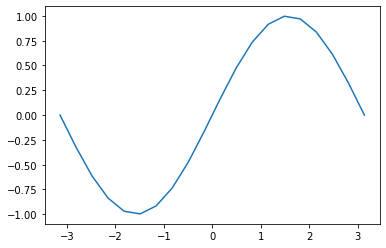

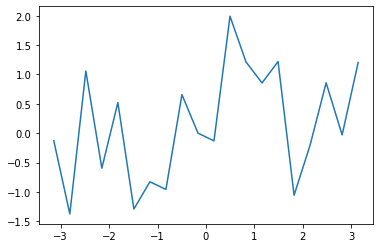

Result: y = -1.1028151393997394 + 0.4961670230557141 x + 0.19539749968553713 x^2 + -0.04378972862250684 x^3


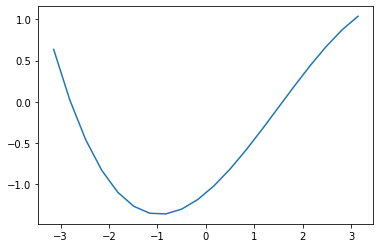

In [ ]:
'''
a1_question_1
'''
import numpy as np
import math

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 20)
y = np.sin(x)

import matplotlib.pyplot as plt
import numpy as np
# if using a jupyter notebook
%matplotlib inline    

#x = np.arange(0,2*np.pi,np.pi/10)   # start,stop,step
#y = np.sin(x) + np.random.normal(0,1,20)

plt.plot(x,y)
plt.show()

y = np.sin(x) + np.random.normal(0, 1, 20)

plt.plot(x,y)
plt.show()

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-4
for t in range(20):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    ##print(t, loss)
    ##if t % 100 == 99:
        ##print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

#y = {a} + {b} x + {c} x^2 + {d} x^3'

plt.plot(x, y_pred)
plt.show()



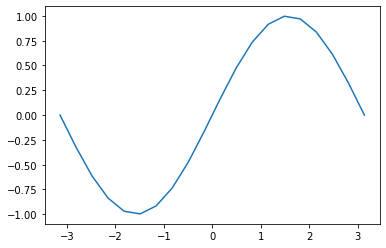

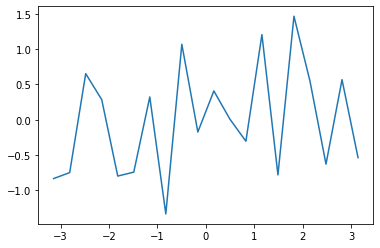

Result: y = 0.9425277326682352 + 0.8873697451015352 x + -0.4782167610888849 x^2


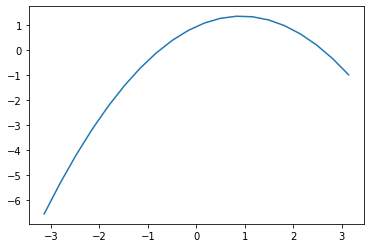

In [ ]:
import numpy as np
import math

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 20)
y = np.sin(x)

import matplotlib.pyplot as plt
import numpy as np
# if using a jupyter notebook
%matplotlib inline    

#x = np.arange(0,2*np.pi,np.pi/10)   # start,stop,step
#y = np.sin(x) + np.random.normal(0,1,20)

plt.plot(x,y)
plt.show()

y = np.sin(x) + np.random.normal(0, 1, 20)

plt.plot(x,y)
plt.show()

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()
e = np.random.randn()

learning_rate = 1e-6
for t in range(20):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2
    #y_pred = a + b * x + c * x ** 2 + d * x ** 3
    #y_pred = a + b * x + c * x ** 2 + d * x ** 3 + e * x ** 4

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    ##if t % 100 == 99:
        ##print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    #grad_d = (grad_y_pred * x ** 3).sum()
    #grad_e = (grad_y_pred * x ** 4).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    #d -= learning_rate * grad_d
    #e -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2')
#print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')
#print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3 + {e} x^4')

#y = {a} + {b} x + {c} x^2 + {d} x^3'

plt.plot(x, y_pred)
plt.show()


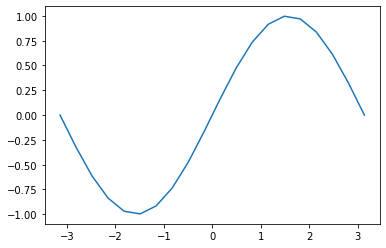

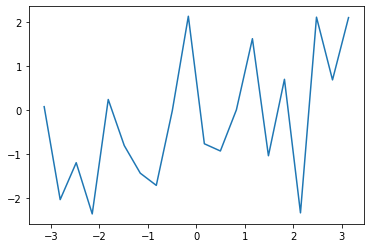

Result: y = 0.15248789270435137 + -0.8361999653413025 x + -0.09984621700927099 x^2 + 0.15798342868853596 x^3


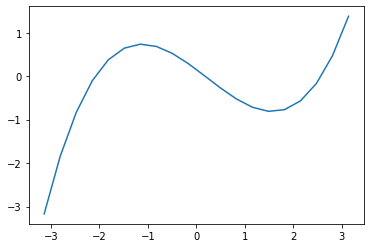

In [ ]:
'''
a1_question_1
'''
import numpy as np
import math

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 20)
y = np.sin(x)

import matplotlib.pyplot as plt
import numpy as np
# if using a jupyter notebook
%matplotlib inline    

#x = np.arange(0,2*np.pi,np.pi/10)   # start,stop,step
#y = np.sin(x) + np.random.normal(0,1,20)

plt.plot(x,y)
plt.show()

y = np.sin(x) + np.random.normal(0, 1, 20)

plt.plot(x,y)
plt.show()

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-4

for t in range(20):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    ##print(t, loss)
    ##if t % 100 == 99:
        ##print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

#y = {a} + {b} x + {c} x^2 + {d} x^3'

plt.plot(x, y_pred)
plt.show()



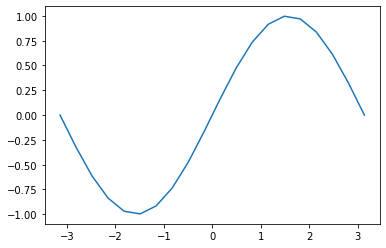

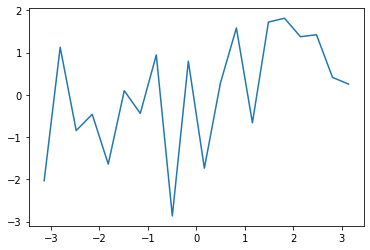

Result: y = 1.092730555301683 + -1.0606435720080434 x + -0.6274844991123921 x^2 + -0.37847409118240233 x^3 + 0.33190727677239207 x^4


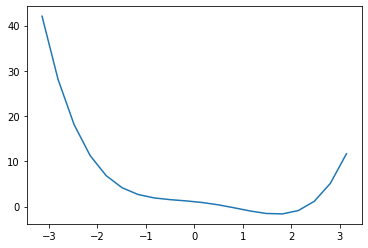

In [ ]:
import numpy as np
import math

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 20)
y = np.sin(x)

import matplotlib.pyplot as plt
import numpy as np
# if using a jupyter notebook
%matplotlib inline    

#x = np.arange(0,2*np.pi,np.pi/10)   # start,stop,step
#y = np.sin(x) + np.random.normal(0,1,20)

plt.plot(x,y)
plt.show()

y = np.sin(x) + np.random.normal(0, 1, 20)

plt.plot(x,y)
plt.show()

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()
e = np.random.randn()

learning_rate = 1e-6
for t in range(20):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    #y_pred = a + b * x + c * x ** 2 + d * x ** 3
    y_pred = a + b * x + c * x ** 2 + d * x ** 3 + e * x ** 4

    # Compute and print loss
    loss = np.square(y_pred - y).sum()
    if t % 100 == 99:
        print(t, loss)

    # Backprop to compute gradients of a, b, c, d with respect to loss
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = grad_y_pred.sum()
    grad_b = (grad_y_pred * x).sum()
    grad_c = (grad_y_pred * x ** 2).sum()
    grad_d = (grad_y_pred * x ** 3).sum()
    grad_e = (grad_y_pred * x ** 4).sum()

    # Update weights
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d
    e -= learning_rate * grad_d

#print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')
print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3 + {e} x^4')

#y = {a} + {b} x + {c} x^2 + {d} x^3'

plt.plot(x,y_pred)
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


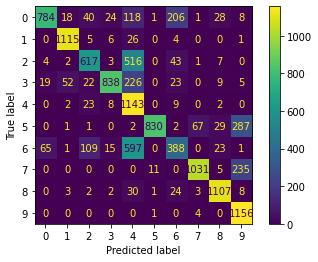

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


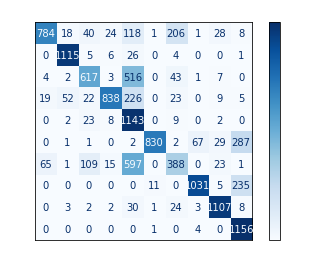

              precision    recall  f1-score   support

           0       0.90      0.64      0.75      1228
           1       0.93      0.96      0.95      1157
           2       0.75      0.52      0.61      1193
           3       0.94      0.70      0.80      1194
           4       0.43      0.96      0.59      1187
           5       0.98      0.68      0.80      1219
           6       0.56      0.32      0.41      1199
           7       0.93      0.80      0.86      1282
           8       0.91      0.94      0.93      1180
           9       0.68      1.00      0.81      1161

    accuracy                           0.75     12000
   macro avg       0.80      0.75      0.75     12000
weighted avg       0.80      0.75      0.75     12000



In [ ]:

import pandas as pd
#from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

'''
def to_target(x):
    """Map targets to target names"""   
    return list(dataset.target_names)[x]
 
# Load data
dataset = load_breast_cancer()
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df['target'] = pd.Series(dataset.target)
df['target_names'] = df['target'].apply(to_target)
 
 
# Define predictor and predicted datasets
X = df.drop(['target','target_names'], axis=1).values
y = df['target_names'].values
'''
import pandas as pd
import gzip
import numpy as np

from sklearn import preprocessing
##from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

filePath_train_set = './train-images-idx3-ubyte.gz'
filePath_train_label = './train-labels-idx1-ubyte.gz'

filePath_test_set = './t10k-images-idx3-ubyte.gz'
filePath_test_label = './t10k-labels-idx1-ubyte.gz'

with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

'''
print(type(testLabel))
print(trainSet.shape)
print(trainLabel.shape)
print(testSet.shape)
print(testLabel.shape)

'''
#X_train, X_test, y_train, y_test = trainSet, testSet, trainLabel, testLabel
X_train, X_test, y_train, y_test = train_test_split(trainSet, trainLabel, test_size = 0.2, random_state=None)

'''
print(type(testLabel))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
'''

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

logi_regr = LogisticRegression(random_state=None)
logi_regr.fit(X_train_scaled, y_train)

y_pred = logi_regr.predict(X_test)

 
# compute accuracy of the model
logi_regr.score(X_test, y_test)


# Create a confusion matrix

from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)
cm



# Plot the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

##cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()
 
color = 'white'
matrix = plot_confusion_matrix(logi_regr, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()


# Run the classification report

from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))





<class 'numpy.ndarray'>
(48000, 784)
(12000, 784)
(48000,)
(12000,)


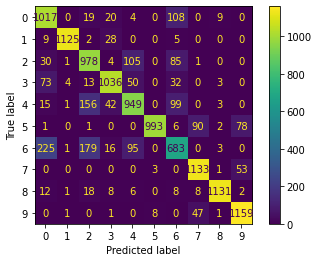

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


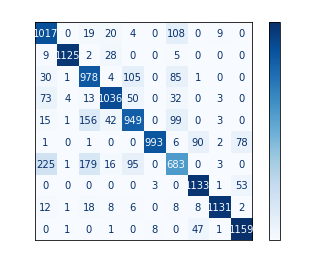

              precision    recall  f1-score   support

           0       0.74      0.86      0.79      1177
           1       0.99      0.96      0.98      1169
           2       0.72      0.81      0.76      1204
           3       0.90      0.86      0.88      1211
           4       0.78      0.75      0.77      1265
           5       0.99      0.85      0.91      1171
           6       0.67      0.57      0.61      1202
           7       0.89      0.95      0.92      1190
           8       0.98      0.95      0.96      1194
           9       0.90      0.95      0.92      1217

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



In [ ]:

import pandas as pd
#from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

'''
def to_target(x):
    """Map targets to target names"""   
    return list(dataset.target_names)[x]
 
# Load data
dataset = load_breast_cancer()
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df['target'] = pd.Series(dataset.target)
df['target_names'] = df['target'].apply(to_target)
 
 
# Define predictor and predicted datasets
X = df.drop(['target','target_names'], axis=1).values
y = df['target_names'].values
'''
import pandas as pd
import gzip
import numpy as np

from sklearn import preprocessing
##from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

filePath_train_set = './train-images-idx3-ubyte.gz'
filePath_train_label = './train-labels-idx1-ubyte.gz'

filePath_test_set = './t10k-images-idx3-ubyte.gz'
filePath_test_label = './t10k-labels-idx1-ubyte.gz'

with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

'''
print(type(testLabel))
print(trainSet.shape)
print(trainLabel.shape)
print(testSet.shape)
print(testLabel.shape)

'''
#X_train, X_test, y_train, y_test = trainSet, testSet, trainLabel, testLabel
X_train, X_test, y_train, y_test = train_test_split(trainSet, trainLabel, test_size = 0.2, random_state=None)


print(type(testLabel))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


# train the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
 
# compute accuracy of the model
knn.score(X_test, y_test)


# Create a confusion matrix

from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred)
cm



# Plot the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

##cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()
 
color = 'white'
matrix = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()


# Run the classification report

from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))





<class 'numpy.ndarray'>
(48000, 784)
(12000, 784)
(48000,)
(12000,)


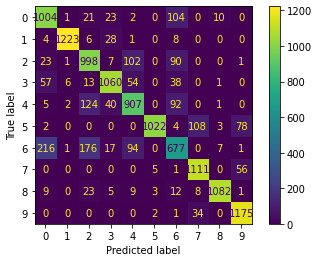

              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1165
           1       0.99      0.96      0.98      1270
           2       0.73      0.82      0.77      1222
           3       0.90      0.86      0.88      1229
           4       0.78      0.77      0.78      1171
           5       0.99      0.84      0.91      1217
           6       0.66      0.57      0.61      1189
           7       0.88      0.95      0.91      1173
           8       0.98      0.94      0.96      1152
           9       0.90      0.97      0.93      1212

    accuracy                           0.85     12000
   macro avg       0.86      0.85      0.85     12000
weighted avg       0.86      0.85      0.85     12000



In [ ]:

import pandas as pd
#from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

'''
def to_target(x):
    """Map targets to target names"""   
    return list(dataset.target_names)[x]
 
# Load data
dataset = load_breast_cancer()
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df['target'] = pd.Series(dataset.target)
df['target_names'] = df['target'].apply(to_target)
 
 
# Define predictor and predicted datasets
X = df.drop(['target','target_names'], axis=1).values
y = df['target_names'].values
'''
import pandas as pd
import gzip
import numpy as np

from sklearn import preprocessing
##from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

filePath_train_set = './train-images-idx3-ubyte.gz'
filePath_train_label = './train-labels-idx1-ubyte.gz'

filePath_test_set = './t10k-images-idx3-ubyte.gz'
filePath_test_label = './t10k-labels-idx1-ubyte.gz'

with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

'''
print(type(testLabel))
print(trainSet.shape)
print(trainLabel.shape)
print(testSet.shape)
print(testLabel.shape)

'''
#X_train, X_test, y_train, y_test = trainSet, testSet, trainLabel, testLabel
X_train, X_test, y_train, y_test = train_test_split(trainSet, trainLabel, test_size = 0.2, random_state=None)


print(type(testLabel))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


# train the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
 
# compute accuracy of the model
knn.score(X_test, y_test)


# Create a confusion matrix

from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,y_pred)
cm



# Plot the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

##cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

''' 
color = 'white'
matrix = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()
'''

# Run the classification report

from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))





<class 'numpy.ndarray'>
(48000, 784)
(12000, 784)
(48000,)
(12000,)


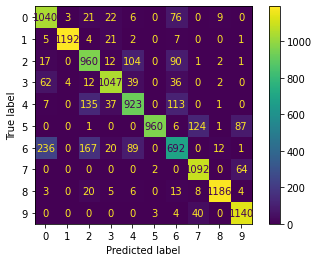

              precision    recall  f1-score   support

           0       0.76      0.88      0.82      1177
           1       0.99      0.97      0.98      1232
           2       0.73      0.81      0.77      1187
           3       0.90      0.87      0.89      1202
           4       0.79      0.76      0.77      1216
           5       0.99      0.81      0.90      1179
           6       0.67      0.57      0.61      1217
           7       0.86      0.94      0.90      1158
           8       0.98      0.95      0.97      1245
           9       0.88      0.96      0.92      1187

    accuracy                           0.85     12000
   macro avg       0.86      0.85      0.85     12000
weighted avg       0.86      0.85      0.85     12000



In [ ]:

import pandas as pd
#from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

'''
def to_target(x):
    """Map targets to target names"""   
    return list(dataset.target_names)[x]
 
# Load data
dataset = load_breast_cancer()
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df['target'] = pd.Series(dataset.target)
df['target_names'] = df['target'].apply(to_target)
 
 
# Define predictor and predicted datasets
X = df.drop(['target','target_names'], axis=1).values
y = df['target_names'].values
'''
import pandas as pd
import gzip
import numpy as np

from sklearn import preprocessing
##from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

filePath_train_set = './train-images-idx3-ubyte.gz'
filePath_train_label = './train-labels-idx1-ubyte.gz'

filePath_test_set = './t10k-images-idx3-ubyte.gz'
filePath_test_label = './t10k-labels-idx1-ubyte.gz'

with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

'''
print(type(testLabel))
print(trainSet.shape)
print(trainLabel.shape)
print(testSet.shape)
print(testLabel.shape)

'''
#X_train, X_test, y_train, y_test = trainSet, testSet, trainLabel, testLabel
X_train, X_test, y_train, y_test = train_test_split(trainSet, trainLabel, test_size = 0.2, random_state=None)


print(type(testLabel))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


# train the model
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
 
# compute accuracy of the model
knn.score(X_test, y_test)


# Create a confusion matrix

from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,y_pred)
cm



# Plot the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

##cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()
 
'''
color = 'white'
matrix = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()
'''

# Run the classification report

from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))





<class 'numpy.ndarray'>
(48000, 784)
(12000, 784)
(48000,)
(12000,)


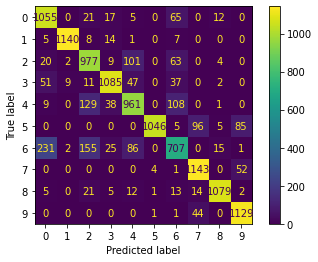

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


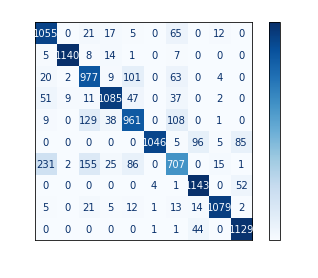

              precision    recall  f1-score   support

           0       0.77      0.90      0.83      1175
           1       0.99      0.97      0.98      1175
           2       0.74      0.83      0.78      1176
           3       0.91      0.87      0.89      1242
           4       0.79      0.77      0.78      1246
           5       0.99      0.85      0.91      1237
           6       0.70      0.58      0.63      1222
           7       0.88      0.95      0.92      1200
           8       0.97      0.94      0.95      1152
           9       0.89      0.96      0.92      1175

    accuracy                           0.86     12000
   macro avg       0.86      0.86      0.86     12000
weighted avg       0.86      0.86      0.86     12000



In [ ]:

import pandas as pd
#from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

'''
def to_target(x):
    """Map targets to target names"""   
    return list(dataset.target_names)[x]
 
# Load data
dataset = load_breast_cancer()
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df['target'] = pd.Series(dataset.target)
df['target_names'] = df['target'].apply(to_target)
 
 
# Define predictor and predicted datasets
X = df.drop(['target','target_names'], axis=1).values
y = df['target_names'].values
'''
import pandas as pd
import gzip
import numpy as np

from sklearn import preprocessing
##from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

filePath_train_set = './train-images-idx3-ubyte.gz'
filePath_train_label = './train-labels-idx1-ubyte.gz'

filePath_test_set = './t10k-images-idx3-ubyte.gz'
filePath_test_label = './t10k-labels-idx1-ubyte.gz'

with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

'''
print(type(testLabel))
print(trainSet.shape)
print(trainLabel.shape)
print(testSet.shape)
print(testLabel.shape)

'''
#X_train, X_test, y_train, y_test = trainSet, testSet, trainLabel, testLabel
X_train, X_test, y_train, y_test = train_test_split(trainSet, trainLabel, test_size = 0.2, random_state=None)


print(type(testLabel))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


# train the model
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
 
# compute accuracy of the model
knn.score(X_test, y_test)


# Create a confusion matrix

from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,y_pred)
cm



# Plot the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

##cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()
 
color = 'white'
matrix = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()


# Run the classification report

from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))





<class 'numpy.ndarray'>
(48000, 784)
(12000, 784)
(48000,)
(12000,)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


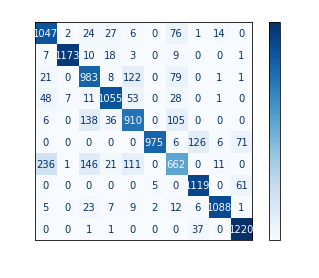

              precision    recall  f1-score   support

           0       0.76      0.87      0.82      1197
           1       0.99      0.96      0.98      1221
           2       0.74      0.81      0.77      1215
           3       0.90      0.88      0.89      1203
           4       0.75      0.76      0.76      1195
           5       0.99      0.82      0.90      1184
           6       0.68      0.56      0.61      1188
           7       0.87      0.94      0.90      1185
           8       0.97      0.94      0.96      1153
           9       0.90      0.97      0.93      1259

    accuracy                           0.85     12000
   macro avg       0.86      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



In [ ]:

import pandas as pd
#from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

'''
def to_target(x):
    """Map targets to target names"""   
    return list(dataset.target_names)[x]
 
# Load data
dataset = load_breast_cancer()
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df['target'] = pd.Series(dataset.target)
df['target_names'] = df['target'].apply(to_target)
 
 
# Define predictor and predicted datasets
X = df.drop(['target','target_names'], axis=1).values
y = df['target_names'].values
'''
import pandas as pd
import gzip
import numpy as np

from sklearn import preprocessing
##from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

filePath_train_set = './train-images-idx3-ubyte.gz'
filePath_train_label = './train-labels-idx1-ubyte.gz'

filePath_test_set = './t10k-images-idx3-ubyte.gz'
filePath_test_label = './t10k-labels-idx1-ubyte.gz'

with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

'''
print(type(testLabel))
print(trainSet.shape)
print(trainLabel.shape)
print(testSet.shape)
print(testLabel.shape)

'''
#X_train, X_test, y_train, y_test = trainSet, testSet, trainLabel, testLabel
X_train, X_test, y_train, y_test = train_test_split(trainSet, trainLabel, test_size = 0.2, random_state=None)


print(type(testLabel))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


# train the model
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
 
# compute accuracy of the model
knn.score(X_test, y_test)


# Create a confusion matrix

from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,y_pred)
cm



# Plot the confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
 
color = 'white'
matrix = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()


# Run the classification report

from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))





<class 'numpy.ndarray'>
(60000, 784)
(60000,)
(10000, 784)
(10000,)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


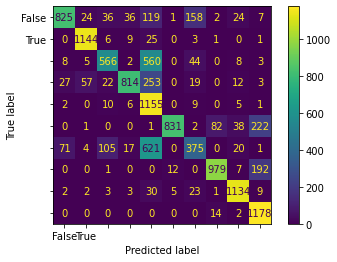

 
[[ 825   24   36   36  119    1  158    2   24    7]
 [   0 1144    6    9   25    0    3    1    0    1]
 [   8    5  566    2  560    0   44    0    8    3]
 [  27   57   22  814  253    0   19    0   12    3]
 [   2    0   10    6 1155    0    9    0    5    1]
 [   0    1    0    0    1  831    2   82   38  222]
 [  71    4  105   17  621    0  375    0   20    1]
 [   0    0    1    0    0   12    0  979    7  192]
 [   2    2    3    3   30    5   23    1 1134    9]
 [   0    0    0    0    0    0    0   14    2 1178]]
 
Accuracy = 0.9879578524836929


In [ ]:

import pandas as pd
import gzip
import numpy as np

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

filePath_train_set = './train-images-idx3-ubyte.gz'
filePath_train_label = './train-labels-idx1-ubyte.gz'

filePath_test_set = './t10k-images-idx3-ubyte.gz'
filePath_test_label = './t10k-labels-idx1-ubyte.gz'

with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

print(type(testLabel))

print(trainSet.shape)

print(trainLabel.shape)

print(testSet.shape)

print(testLabel.shape)

#X_train, X_test, y_train, y_test = trainSet, testSet, trainLabel, testLabel
X_train, X_test, y_train, y_test = train_test_split(trainSet, trainLabel, test_size = 0.2, random_state=None)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

classifier = LogisticRegression(random_state=None)
classifier.fit(X_train_scaled, y_train)

##y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix

##confusion_matrix = confusion_matrix(y_test, y_pred)

#y_pred = classifier.predict(X_test)
##y_train_predict = classifier.predict(X_train_scaled)
y_train_predict = classifier.predict(X_test)
##y_test_predict = classifier.predict(X_test)


from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_train_predict)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

print(" ")
print(confusion_matrix)
print(" ")
C11= confusion_matrix[0,0]
C22=confusion_matrix[1,1]
C12= confusion_matrix[0,1]
C21=confusion_matrix[1,0]
#accuracy = '{0:.2f}'.format((C11+C22)/(C11+C12+C21+C22))
accuracy = (C11+C22)/(C11+C12+C21+C22)
print("Accuracy = "+str(accuracy))



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

# Let us import some libraries that we will use quite often
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression

# using Softmax Regression (multi-class classification problem)
log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
# 'C' is hypeparameter for regularizing L2
# 'lbfgs' is Byoden-Fletcher-Goldfarb-Shanno(BFGS) algorithm
log_clf.fit(X_train_scaled, y_train)

<class 'numpy.ndarray'>
(60000, 784)
(60000,)
(10000, 784)
(10000,)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


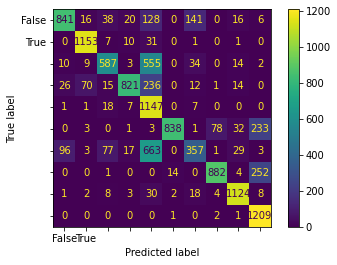

ValueError: ignored

In [ ]:

import pandas as pd
import gzip
import numpy as np

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

filePath_train_set = './train-images-idx3-ubyte.gz'
filePath_train_label = './train-labels-idx1-ubyte.gz'

filePath_test_set = './t10k-images-idx3-ubyte.gz'
filePath_test_label = './t10k-labels-idx1-ubyte.gz'

with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

print(type(testLabel))

print(trainSet.shape)

print(trainLabel.shape)

print(testSet.shape)

print(testLabel.shape)

#X_train, X_test, y_train, y_test = trainSet, testSet, trainLabel, testLabel
X_train, X_test, y_train, y_test = train_test_split(trainSet, trainLabel, test_size = 0.2, random_state=None)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_text_scaled = scaler.fit_transform(X_test.astype(np.float64))

classifier = LogisticRegression(random_state=None)
classifier.fit(X_train_scaled, y_train)

#y_pred = classifier.predict(X_test)
##y_train_predict = classifier.predict(X_train_scaled)
y_train_predict = classifier.predict(X_test)
##y_test_predict = classifier.predict(X_test)



from sklearn.metrics import confusion_matrix

#confusion_matrix = confusion_matrix(y_test, y_pred)

from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_train_predict)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

log_accuracy = accuracy_score(y_train, y_train_predict)
log_precision = precision_score(y_train, y_train_predict, average='weighted')
log_recall = recall_score(y_train, y_train_predict, average='weighted')
log_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("Logistic Accuracy: ", log_accuracy)
print("Logistic Precision: ", log_precision)
print("Logistic Recall: ", log_precision)
print("Logistic F1 Score: ", log_f1_score)

print(" ")
print(confusion_matrix)
print(" ")
C11= confusion_matrix[0,0]
C22=confusion_matrix[1,1]
C12= confusion_matrix[0,1]
C21=confusion_matrix[1,0]
#accuracy = '{0:.2f}'.format((C11+C22)/(C11+C12+C21+C22))
accuracy = (C11+C22)/(C11+C12+C21+C22)
print("Accuracy = "+str(accuracy))


In [ ]:

import pandas as pd
import gzip
import numpy as np

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

filePath_train_set = './train-images-idx3-ubyte.gz'
filePath_train_label = './train-labels-idx1-ubyte.gz'

filePath_test_set = './t10k-images-idx3-ubyte.gz'
filePath_test_label = './t10k-labels-idx1-ubyte.gz'

with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

print(type(testLabel))

print(trainSet.shape)

print(trainLabel.shape)

print(testSet.shape)

print(testLabel.shape)

#X_train, X_test, y_train, y_test = trainSet, testSet, trainLabel, testLabel
X_train, X_test, y_train, y_test = train_test_split(trainSet, trainLabel, test_size = 0.2, random_state=None)


classifier = LogisticRegression(random_state=None)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(" ")
print(confusion_matrix)
print(" ")
C11= confusion_matrix[0,0]
C22=confusion_matrix[1,1]
C12= confusion_matrix[0,1]
C21=confusion_matrix[1,0]
#accuracy = '{0:.2f}'.format((C11+C22)/(C11+C12+C21+C22))
accuracy = (C11+C22)/(C11+C12+C21+C22)
print("Accuracy = "+str(accuracy))


<class 'numpy.ndarray'>
(60000, 784)
(60000,)
(10000, 784)
(10000,)
 
[[1000   11   20   50    7    0  108    0   21    3]
 [   6 1140    9   19    6    0    3    0    0    1]
 [  20    5  899    9  160    0   75    0   12    0]
 [  48   25   18 1058   47    0   36    1    3    0]
 [   2    3  100   33  975    0   77    0    4    0]
 [   0    0    1    0    0 1048    0   61   14   41]
 [ 186    6  145   34  136    0  705    0   19    1]
 [   0    0    0    0    0   45    0 1125    7   49]
 [   4    1   13    9    8    6   22    8 1153    2]
 [   0    0    0    0    0   13    0   45    6 1073]]
 
Accuracy = 0.9921186833565137


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<class 'numpy.ndarray'>
(60000, 784)
(60000,)
(10000, 784)
(10000,)
(48000, 784)
(48000,)
(12000, 784)
(12000,)


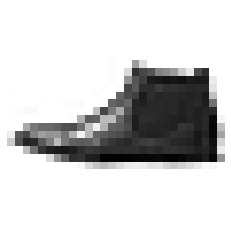

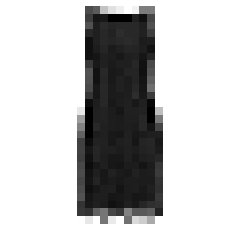

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Accuracy:  0.8815833333333334
Logistic Precision:  0.8807112164242923
Logistic Recall:  0.8807112164242923
Logistic F1 Score:  0.8809551667829246


In [ ]:

import pandas as pd
import gzip
import numpy as np

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

filePath_train_set = './train-images-idx3-ubyte.gz'
filePath_train_label = './train-labels-idx1-ubyte.gz'

filePath_test_set = './t10k-images-idx3-ubyte.gz'
filePath_test_label = './t10k-labels-idx1-ubyte.gz'

with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

print(type(testLabel))

print(trainSet.shape)

print(trainLabel.shape)

print(testSet.shape)

print(testLabel.shape)

#X_train, X_test, y_train, y_test = trainSet, testSet, trainLabel, testLabel
X_train, X_test, y_train, y_test = train_test_split(trainSet, trainLabel, test_size = 0.2, random_state=None)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def showImage(data):
    some_article = data
    some_article_image = some_article.reshape(28, 28) # Reshaping it to get the 28x28 pixels
    plt.imshow(some_article_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()
    
showImage(X_train[0])


import numpy as np
np.random.seed(42)   # if you want reproducible results set the random seed value.
shuffle_index = np.random.permutation(48000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

showImage(X_train[0])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

# Let us import some libraries that we will use quite often
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression

# using Softmax Regression (multi-class classification problem)
log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
# 'C' is hypeparameter for regularizing L2
# 'lbfgs' is Byoden-Fletcher-Goldfarb-Shanno(BFGS) algorithm
log_clf.fit(X_train_scaled, y_train)

y_train_predict = log_clf.predict(X_train_scaled)

log_accuracy = accuracy_score(y_train, y_train_predict)
log_precision = precision_score(y_train, y_train_predict, average='weighted')
log_recall = recall_score(y_train, y_train_predict, average='weighted')
log_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("Logistic Accuracy: ", log_accuracy)
print("Logistic Precision: ", log_precision)
print("Logistic Recall: ", log_precision)
print("Logistic F1 Score: ", log_f1_score)




In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
np.random.seed(12345)
%matplotlib inline

# Load Fashion-MNIST
batch_size = 512
train_data = np.array(pd.read_csv('./train.csv'))
test_data = np.array(pd.read_csv('./test.csv'))


X_train_orig = train_data[:, 1:785]
y_train_orig = train_data[:, 0]
X_test = train_data[:, 1:785]
y_test = train_data[:, 0]

X_train_orig = X_train_orig.astype('float32')
X_test = X_test.astype('float32')
X_train_orig /= 255
X_test /= 255

print(X_train_orig.shape)
print(y_train_orig.shape)
print(X_test.shape)
print(y_test.shape)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_orig, y_train_orig, test_size=0.2, random_state=100)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


np.random.seed(42)   # if you want reproducible results set the random seed value.
shuffle_index = np.random.permutation(48000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

#showImage(X_train[0])
plt.imshow(X_train[0].reshape((28, 28)))


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

# Let us import some libraries that we will use quite often
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression

# using Softmax Regression (multi-class classification problem)
log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
# 'C' is hypeparameter for regularizing L2
# 'lbfgs' is Byoden-Fletcher-Goldfarb-Shanno(BFGS) algorithm
log_clf.fit(X_train_scaled, y_train)


# Predicting some instance from the dataset using the above trained model
y_train_predict = log_clf.predict(X_train[0].reshape(1, -1))

# Let us predict all instances of training dataset X_train_scaled using the above trained model
y_train_predict = log_clf.predict(X_train_scaled)

log_accuracy = accuracy_score(y_train, y_train_predict)
log_precision = precision_score(y_train, y_train_predict, average='weighted')
log_recall = recall_score(y_train, y_train_predict, average='weighted')
log_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("Logistic Accuracy: ", log_accuracy)
print("Logistic Precision: ", log_precision)
print("Logistic Recall: ", log_precision)
print("Logistic F1 Score: ", log_f1_score)


import numpy as np
np.random.seed(42)   # if you want reproducible results set the random seed value.
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

showImage(X_train[0])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

# Let us import some libraries that we will use quite often
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

from sklearn.linear_model import LogisticRegression

# using Softmax Regression (multi-class classification problem)
log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
# 'C' is hypeparameter for regularizing L2
# 'lbfgs' is Byoden-Fletcher-Goldfarb-Shanno(BFGS) algorithm
log_clf.fit(X_train_scaled, y_train)

y_train_predict = log_clf.predict(X_train_scaled)

log_accuracy = accuracy_score(y_train, y_train_predict)
log_precision = precision_score(y_train, y_train_predict, average='weighted')
log_recall = recall_score(y_train, y_train_predict, average='weighted')
log_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("Logistic Accuracy: ", log_accuracy)
print("Logistic Precision: ", log_precision)
print("Logistic Recall: ", log_precision)
print("Logistic F1 Score: ", log_f1_score)





